In [5]:
import numpy as np
import matplotlib.pyplot as plt

x1 = np.linspace(-2, 2, 100)
x2 = np.linspace(-1, 3, 100)
X1, X2 = np.meshgrid(x1, x2)


def f(x1, x2):
    return (1 - x1) ** 2 + 100 * (x2 - x1 ** 2) ** 2


iter = 0
x0 = np.array([-1.5, 1.5])
eps = 0.000001


def descent(x):
    return np.array([-2 * (1 - x[0]) - 400 * x[0] * (x[1] - x[0] ** 2),
                     200 * (x[1] - x[0] ** 2)])


def hessian(x):
    return np.array([[2 - 400 * x[1] + 1200 * x[0] ** 2, -400 * x[0]],
                     [-400 * x[0], 200]])

In [6]:
def SR1_update(H, s, y):
    rho = 1.0 / np.dot(y, s)
    V = np.eye(H.shape[0]) - rho * np.outer(s, y)
    H = np.dot(V, np.dot(H, V.T)) + rho * np.outer(s, s)
    return H

def DFP_update(H, s, y):
    Hy = np.dot(H, y)
    H += np.outer(s, s) / np.dot(s, y) - np.outer(Hy, Hy) / np.dot(y, Hy)
    return H

def BFGS_update(H, s, y):
    rho = 1.0 / np.dot(y, s)
    I = np.eye(H.shape[0])
    Hy = np.dot(H, y)
    Hs = np.dot(H, s)

    if np.isnan(rho) or np.isinf(rho) or np.dot(y, s) == 0 or np.dot(s, Hs) == 0:
        return H

    H += np.outer((rho * s - Hy / np.dot(y, Hy)), (rho * s - Hs /
                  np.dot(s, Hs)).T) + (np.dot(Hy, Hy) / np.dot(y, Hy)) * np.outer(s, s)
    return H

0 [-1.5  1.5] 455.0
1 [-1.48344371  2.20033113] 5.1295385847781265
2 [-1.46697303  2.15173769] 5.093661128547216
3 [-1.32080057  1.72048503] 17.336671561030847
4 [-1.21142586  1.41436798] 30.194547889112677
5 [-1.12812082  1.22272305] 26.78866568102668
6 [-0.98525174  0.96301676] 7.006743986493085
7 [-0.88670356  0.74998317] 16.634168921755748
8 [-0.72951298  0.4684842 ] 22.04847045675893
9 [-0.67930022  0.44095607] 8.926884449683794
10 [-0.47681335  0.17233663] 13.446255846265665
11 [-0.44631805  0.18610691] 5.230073470689842
12 [-0.33820415  0.0918225 ] 5.7283019067174985
13 [-0.22150563  0.00990574] 7.831801400979637
14 [-0.12711214 -0.00992316] 5.216131527280893
15 [-0.02660985 -0.00987537] 2.1658694161951897
16 [ 0.04838727 -0.02653438] 5.77514211637814
17 [0.18623558 0.0031594 ] 6.304858883006112
18 [0.21647765 0.03814402] 1.7437100118989703
19 [0.37941037 0.11166267] 6.45791218160732
20 [0.38096674 0.13889707] 1.2477170586972175
21 [0.49625369 0.23283223] 2.6871006781372495
22 [

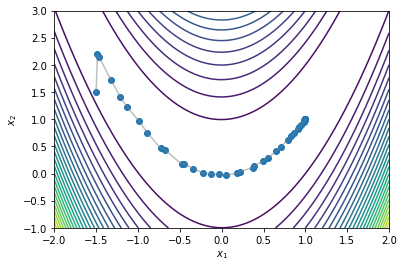

In [7]:
# SR1
x = x0
path1 = []

H = np.linalg.inv(hessian(x))

while iter < 1000:
    g = descent(x)
    print(iter, x, np.linalg.norm(g, ord=np.inf))
    path1.append(x)
    if np.linalg.norm(g, ord=np.inf) < eps:
        break
    d = -np.dot(H, g)
    a = 1
    # Armijo condition
    while f(x[0] + a * d[0], x[1] + a * d[1]) >= f(x[0], x[1]) + 0.5 * a * np.dot(g, d):
        a /= 2
    s = a * d
    x_new = x + s
    y = descent(x_new) - g
    H = SR1_update(H, s, y)
    x = x_new
    iter += 1


plt.contour(X1, X2, f(X1, X2), levels=30)
plt.scatter(*zip(*path1), marker='o')
plt.plot(*zip(*path1), linestyle='-', color='gray', alpha=0.5)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

38 [-1.5  1.5] 455.0
39 [-1.48344371  2.20033113] 5.1295385847781265
40 [-1.46698496  2.15177348] 5.09322237121232
41 [-1.32080074  1.72048433] 17.337278866382515
42 [-1.21457077  1.42247034] 30.03803323026216
43 [-1.14781177  1.26608802] 27.887213661518736
44 [-0.98537039  0.90928777] 28.276691309839492
45 [-0.92518446  0.80417332] 23.017587396956824
46 [-0.79344103  0.60346835] 11.864158664724126
47 [-0.62379888  0.33590427] 16.527222513834463
48 [-0.5842699   0.31010406] 10.475946280171021
49 [-0.42468935  0.14773768] 8.391297568100565
50 [-0.30245908  0.05595685] 7.10492889711978
51 [-0.19339948  0.00545452] 6.389768178247642
52 [-0.08451909 -0.01614906] 4.658507748542451
53 [ 0.03260433 -0.01700764] 3.6141361940638523
54 [0.16495373 0.01122879] 3.1961891045001454
55 [0.29669172 0.08060323] 1.4845491226435803
56 [0.34950219 0.10298636] 3.8330851282174145
57 [0.45207126 0.18060584] 4.752516215468533
58 [0.50113121 0.2337575 ] 3.4749982297814954
59 [0.57518734 0.32440517] 1.287060927

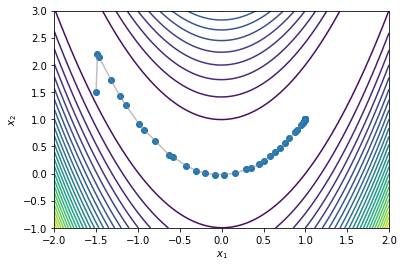

In [8]:
# DFP
x = x0
path1 = []

H = np.linalg.inv(hessian(x))

while iter < 1000:
    g = descent(x)
    print(iter, x, np.linalg.norm(g, ord=np.inf))
    path1.append(x)
    if np.linalg.norm(g, ord=np.inf) < eps:
        break
    d = -np.dot(H, g)
    a = 1
    # Armijo condition
    while f(x[0] + a * d[0], x[1] + a * d[1]) >= f(x[0], x[1]) + 0.5 * a * np.dot(g, d):
        a /= 2
    s = a * d
    x_new = x + s
    y = descent(x_new) - g
    H = DFP_update(H, s, y)
    x = x_new
    iter += 1


plt.contour(X1, X2, f(X1, X2), levels=30)
plt.scatter(*zip(*path1), marker='o')
plt.plot(*zip(*path1), linestyle='-', color='gray', alpha=0.5)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

75 [-1.5  1.5] 455.0
76 [-1.48344371  2.20033113] 5.1295385847781265
77 [-1.46669687  2.15082667] 5.152245718294003
78 [-1.46168485  2.14507427] 1.710332875669618
79 [-1.45929798  2.1423348 ] 2.55684345039473
80 [-1.4587138   2.14166433] 3.145402106148172
81 [-1.45867747  2.14162265] 3.182786186353936
82 [-1.23841878  1.53396586] 4.33575648831644
83 [-1.11777876  1.20526192] 23.983325008321852
84 [-1.13036586  1.24160919] 20.591262846406494
85 [-1.13672741  1.26062319] 18.608045992959667
86 [-1.14272372  1.27989798] 16.132988861715532
87 [-1.11410988  1.24061454] 4.507317469219749
88 [-1.04687    1.0585799] 19.736862822253336
89 [-1.05942993  1.09511569] 15.677705311606687
90 [-1.06316093  1.10705329] 14.017068848279035
91 [-1.06627752  1.12796275] 7.964752644842827
92 [-1.02299633  1.01310911] 17.718289763748402
93 [-1.02848815  1.02913819] 15.843317561300847
94 [-1.03504669  1.04887983] 13.361420392721993
95 [-1.0388652   1.06540522] 9.827094487037314
96 [-1.0132453   0.99980769] 14.

D:\Temp\ipykernel_50400\4255840462.py:13: RuntimeWarning: divide by zero encountered in double_scalars
  rho = 1.0 / np.dot(y, s)


731 [0.98679943 0.97374913] 0.016932570700391517
732 [0.98679943 0.97374913] 0.016932570700391517
733 [0.98679943 0.97374913] 0.016932570700391517
734 [0.98679943 0.97374913] 0.016932570700391517
735 [0.98679943 0.97374913] 0.016932570700391517
736 [0.98679943 0.97374913] 0.016932570700391517
737 [0.98679943 0.97374913] 0.016932570700391517
738 [0.98679943 0.97374913] 0.016932570700391517
739 [0.98679943 0.97374913] 0.016932570700391517
740 [0.98679943 0.97374913] 0.016932570700391517
741 [0.98679943 0.97374913] 0.016932570700391517
742 [0.98679943 0.97374913] 0.016932570700391517
743 [0.98679943 0.97374913] 0.016932570700391517
744 [0.98679943 0.97374913] 0.016932570700391517
745 [0.98679943 0.97374913] 0.016932570700391517
746 [0.98679943 0.97374913] 0.016932570700391517
747 [0.98679943 0.97374913] 0.016932570700391517
748 [0.98679943 0.97374913] 0.016932570700391517
749 [0.98679943 0.97374913] 0.016932570700391517
750 [0.98679943 0.97374913] 0.016932570700391517
751 [0.98679943 0.97

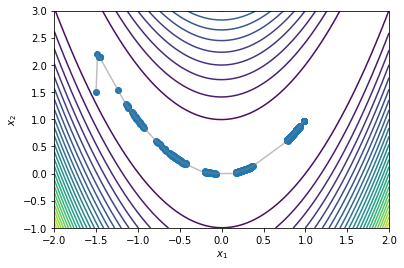

In [9]:
# BFGS
x = x0
path1 = []

H = np.linalg.inv(hessian(x))

while iter < 1000:
    g = descent(x)
    print(iter, x, np.linalg.norm(g, ord=np.inf))
    path1.append(x)
    if np.linalg.norm(g, ord=np.inf) < eps:
        break
    d = -np.dot(H, g)
    a = 1
    # Armijo condition
    while f(x[0] + a * d[0], x[1] + a * d[1]) >= f(x[0], x[1]) + 0.5 * a * np.dot(g, d):
        a /= 2
    s = a * d
    x_new = x + s
    y = descent(x_new) - g
    H = BFGS_update(H, s, y)
    x = x_new
    iter += 1


plt.contour(X1, X2, f(X1, X2), levels=30)
plt.scatter(*zip(*path1), marker='o')
plt.plot(*zip(*path1), linestyle='-', color='gray', alpha=0.5)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()